In [5]:
import pandas as pd
import numpy as np

In [6]:
df_train = pd.read_csv("D:\\datapool\\cs-training.csv")

x = df_train.drop([u'Unnamed: 0', u'SeriousDlqin2yrs'] , axis = 1)
y_column = u'SeriousDlqin2yrs'
y = df_train[u'SeriousDlqin2yrs']

In [7]:
x["test_cat1"] = pd.Series(np.random.randint(0,5,size=150000)).apply(lambda x:str(x)+"_test")
x["test_cat2"] = pd.Series(np.random.randint(0,10,size=150000)).apply(lambda x:str(x)+"_test")
x["test_cat3"] = pd.Series(np.random.randint(0,20,size=150000)).apply(lambda x:str(x)+"_test")
x["test_U"] = y
x.loc[x["test_cat1"] == "0_test","test_cat1"] = np.nan
x.loc[x["test_cat2"] == "0_test","test_cat2"] = np.nan
x.loc[x["test_cat3"] == "0_test","test_cat3"] = np.nan

#x["test_cat1"].value_counts()

#print np.random.randint.__doc__

In [14]:
%run D:\gitstore\fy_scorecard.py

ximu = fs_scorecard(x,y,event = 1,workpath = "./")

#ximu.get_woe_iv()

ximu.columns_bin_dict["NumberOfTime30-59DaysPastDueNotWorse"] = [-np.inf,0,np.inf]
ximu.columns_bin_dict["NumberOfTime60-89DaysPastDueNotWorse"] = [-np.inf,0,np.inf]
ximu.columns_bin_dict["NumberOfTimes90DaysLate"] = [-np.inf,0,np.inf]

ximu.get_woe_iv()

ximu.woe_t.head()

FY Scorecard ready!
test_cat3 : too many values for discrete variables.


<string>:84: RuntimeWarning: divide by zero encountered in log


./woe_t.xlsx  generated;
 <name>.woe_t, <name>.iv_t available


,var_name,var_cat,cat_total_count,pos_count,neg_count,p_ni,p_y_total,p_yi,woe,iv_i
0,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.0192]",30000,582,29418,0.210168,0.06684,0.058049,-1.286617,0.195718
1,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0832]",30000,497,29503,0.210775,0.06684,0.049571,-1.447382,0.233323
2,RevolvingUtilizationOfUnsecuredLines,"(0.0832, 0.271]",30000,877,29123,0.208060,0.06684,0.087473,-0.866502,0.104489
3,RevolvingUtilizationOfUnsecuredLines,"(0.271, 0.699]",30000,2107,27893,0.199273,0.06684,0.210154,0.053164,0.000578
4,RevolvingUtilizationOfUnsecuredLines,"(0.699, inf]",30000,5963,24037,0.171725,0.06684,0.594754,1.242254,0.525509


In [15]:
ximu.get_woe_replaced_df()


<name>.df_woe_replaced, <name>.df_binned available


In [22]:
excluded_columns = ["test_U","NumberOfDependents","test_cat1","test_cat2","NumberRealEstateLoansOrLines"]
ximu.genmodel(excluded_columns)

Optimization terminated successfully.
         Current function value: 0.450286
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149992
Method:                           MLE   Df Model:                            7
Date:                Wed, 06 Sep 2017   Pseudo R-squ.:                 -0.8350
Time:                        17:57:02   Log-Likelihood:                -67543.
converged:                       True   LL-Null:                       -36808.
                                        LLR p-value:                     1.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
NumberOfOpenCreditLinesAndLoans          0.1634      0.0

In [17]:
ximu.iv_t

,var_name,iv
0,DebtRatio,0.059488
1,MonthlyIncome,0.070233
2,NumberOfDependents,0.027233
3,NumberOfOpenCreditLinesAndLoans,0.048023
4,NumberOfTime30-59DaysPastDueNotWorse,0.665194
5,NumberOfTime60-89DaysPastDueNotWorse,0.572373
6,NumberOfTimes90DaysLate,0.837551
7,NumberRealEstateLoansOrLines,0.012091
8,RevolvingUtilizationOfUnsecuredLines,1.059619
9,age,0.250039


In [84]:
x_model = ximu.df_woe_replaced.drop(["test_cat1","test_cat2","test_U"],axis=1)
y_model = y

In [86]:
import statsmodels.api as sm

model = sm.Logit(endog=y_model , exog=x_model)
result = model.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.449799
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149990
Method:                           MLE   Df Model:                            9
Date:                Wed, 06 Sep 2017   Pseudo R-squ.:                 -0.8330
Time:                        14:04:17   Log-Likelihood:                -67470.
converged:                       True   LL-Null:                       -36808.
                                        LLR p-value:                     1.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
NumberOfOpenCreditLinesAndLoans          0.1308      0.0

In [98]:
predict_true = pd.DataFrame()
predict_true["true"] = y_model
predict_true["predict"] = result.fittedvalues
predict_true.head()

import sklearn.metrics as skmetric

fpr ,tpr ,thresholds = skmetric.roc_curve(predict_true["true"],predict_true["predict"])
auc =  skmetric.auc(fpr, tpr)

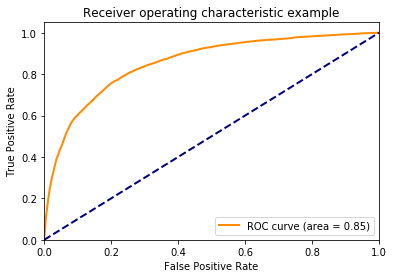

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()